### ISC Within Languages

#### Import Modules

In [5]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, os, nilearn
sys.path.append("..")
from lpp_utils import *
from nilearn import datasets, plotting


#### Open the Mask

In [7]:
file = open('../../data_lpp/fmri_data/other/all293_masker_pickled.obj', 'rb') 
all293_masker_reopened = pickle.load(file)
file.close();
all293_masker_reopened

NiftiLabelsMasker(detrend=True, high_pass=0.01,
                  labels_img='../data_lpp/fmri_data/other/allcombined.nii',
                  low_pass=0.12, standardize=True, t_r=2.0)

#### Load data, perform basic ISC

For illustrative purposes for the English listeners and section1 only

(282, 293, 50)
0.7521870196520247
Assuming 50 subjects with 262 time points and 293 voxel(s) or ROI(s).


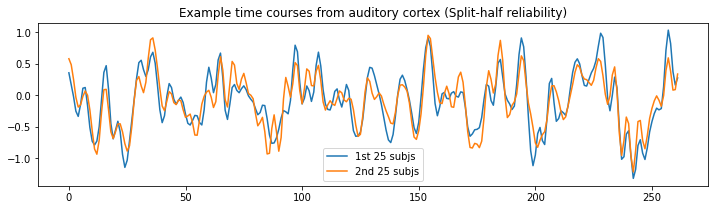

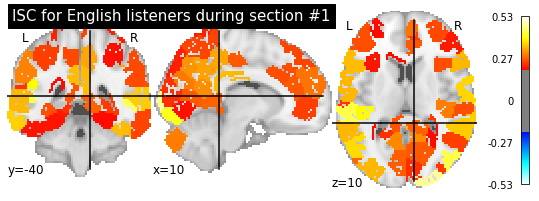

In [30]:
path = "../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppEN-run-01.npy"
curr_data = np.load(path)
print(curr_data.shape)

transient_cut = 10


# Time course split-half plot for auditory cortex 
test_region = 62
m1 = np.mean(curr_data[transient_cut:-transient_cut,:,:25], axis=2)
m2 = np.mean(curr_data[transient_cut:-transient_cut,:,25:], axis=2)
print(np.corrcoef(m1[test_region,:], m2[test_region,:])[0,1])

plt.figure(figsize = (12,3))
plt.plot(m1[:,test_region], label = '1st 25 subjs');
plt.plot(m2[:,test_region], label = '2nd 25 subjs');
plt.title('Example time courses from auditory cortex (Split-half reliability)')
plt.legend();

# whole brain ISC
res = lpp_isc(curr_data[transient_cut:-transient_cut,:,:], summary_statistic = np.mean)
curr_img = all293_masker_reopened.inverse_transform(res)
nilearn.plotting.plot_stat_map(nilearn.image.index_img(curr_img,0), 
                               cut_coords = (10, -40, 10),
                               threshold = 0.2, 
                               title = 'ISC for English listeners during section #1');

#### Generalize ISC calculation to multiple runs and across all languages (english, french, chinese)

Note: computing here a pairwise ISC. Typically, the ind2group procedure is to be preferred, but with unequal sample sizes (50 English, 27 French, 33 Chinese), the results are better comparable this way. We will later use a statistical thresholding procedure that helps als running the alternative analysis.

In [32]:
n_runs = 9
isc_english = np.zeros((293,n_runs))
isc_french  = np.zeros((293,n_runs))
isc_chinese = np.zeros((293,n_runs))

for curr_run in range(n_runs):
    # English
    curr_data = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppEN-run-0" + str(curr_run+1) + ".npy")
    isc_english[:, curr_run] = lpp_isc(curr_data[transient_cut:-transient_cut ,:,:], 
                                       summary_statistic = np.mean,
                                       pairwise=True)
    
    # French
    curr_data = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppFR-run-0" + str(curr_run+1) + ".npy")
    isc_french[:, curr_run] = lpp_isc(curr_data[transient_cut:-transient_cut ,:,:], 
                                      summary_statistic = np.mean,
                                      pairwise=True)
    
    # Chinese
    curr_data = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppCN-run-0" + str(curr_run+1) + ".npy")
    isc_chinese[:, curr_run] = lpp_isc(curr_data[transient_cut:-transient_cut ,:,:], 
                                       summary_statistic = np.mean,
                                       pairwise=True)


Assuming 50 subjects with 262 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 289 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 263 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 278 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 306 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 302 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 320 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 334 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 302 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 283 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 295 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 287 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 245 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 273 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Assuming 50 subjects with 272 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 274 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 273 time points and 293 voxel(s) or ROI(s).
Assuming 50 subjects with 348 time points and 293 voxel(s) or ROI(s).
Assuming 27 subjects with 316 time points and 293 voxel(s) or ROI(s).
Assuming 33 subjects with 381 time points and 293 voxel(s) or ROI(s).


In [34]:
isc_chinese.shape

(293, 9)

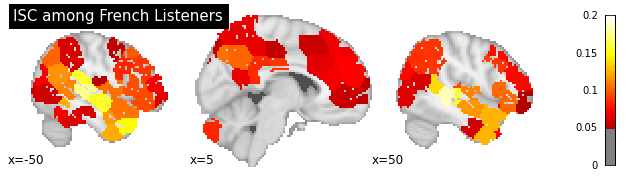

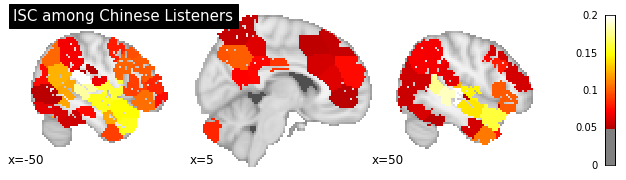

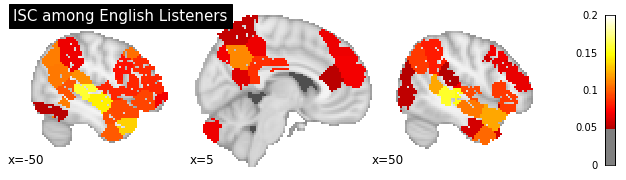

In [56]:
m_isc_fr = np.mean(isc_french , axis = 1)
m_isc_cn = np.mean(isc_chinese, axis = 1)
m_isc_en = np.mean(isc_english, axis = 1)

slices_to_plot = [-50, 5, 50]

plotting.plot_stat_map( all293_masker_reopened.inverse_transform(np.reshape(m_isc_fr, (1, 293))), 
                            colorbar = True, annotate = True,
                            display_mode = "x", cut_coords = slices_to_plot, 
                            threshold = 0.05,  vmax = 0.2,
                            title = 'ISC among French Listeners');

plotting.plot_stat_map( all293_masker_reopened.inverse_transform(np.reshape(m_isc_cn, (1, 293))), 
                            colorbar = True, annotate = True,
                            display_mode = "x", cut_coords = slices_to_plot, 
                            threshold = 0.05,  vmax = 0.2,
                            title = 'ISC among Chinese Listeners');

plotting.plot_stat_map( all293_masker_reopened.inverse_transform(np.reshape(m_isc_en, (1, 293))), 
                            colorbar = True, annotate = True,
                            display_mode = "x", cut_coords = slices_to_plot, 
                            threshold = 0.05,  vmax = 0.2,
                            title = 'ISC among English Listeners');

,French,Chinese,English
French,1.000000,0.927614,0.950587
Chinese,0.927614,1.000000,0.935366
English,0.950587,0.935366,1.000000


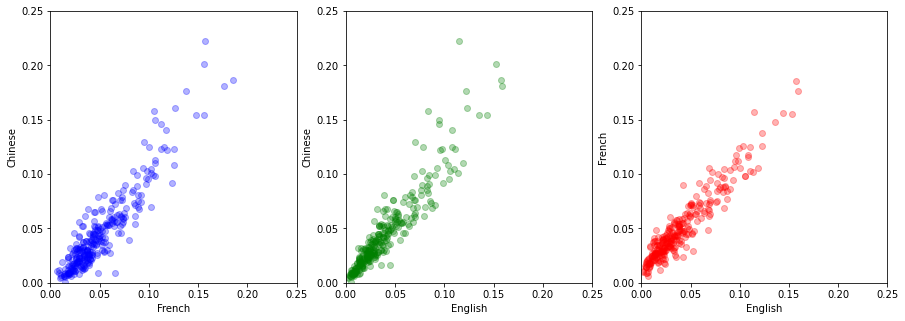

In [154]:
f = plt.figure(figsize = (15,5));
ax = f.add_subplot(1,3,1);
ax.scatter(m_isc_fr, m_isc_cn, color = 'blue', alpha = .3); 
ax.set_xlim(0,.25);
ax.set_ylim(0,.25);
ax.set_xlabel('French')
ax.set_ylabel('Chinese')

ax = f.add_subplot(1,3,2);
ax.scatter(m_isc_en, m_isc_cn, color = 'green', alpha = .3);
ax.set_xlim(0,.25);
ax.set_ylim(0,.25);
ax.set_xlabel('English')
ax.set_ylabel('Chinese')

ax = f.add_subplot(1,3,3);
ax.scatter(m_isc_en,m_isc_fr, color = 'red', alpha = .3);
ax.set_xlim(0,.25);
ax.set_ylim(0,.25);
ax.set_xlabel('English')
ax.set_ylabel('French')


df = pd.DataFrame(np.stack((m_isc_fr, m_isc_cn, m_isc_en)).T, columns = ['French', 'Chinese', 'English'])
df.corr()

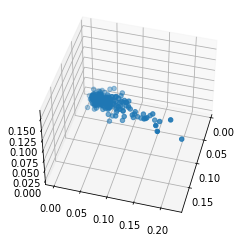

In [170]:
ax = plt.axes(projection='3d')
ax.view_init(45, 15)
ax.scatter3D(m_isc_fr, m_isc_cn, m_isc_en);

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/_utils/niimg.py:61: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


Text(0.5, 1.0, 'Chinese')

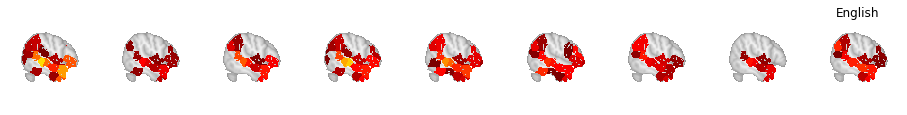

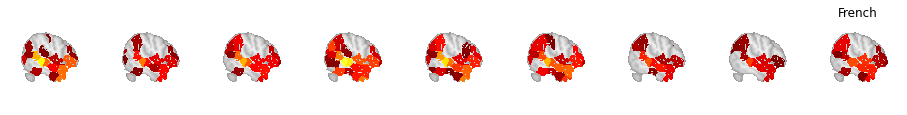

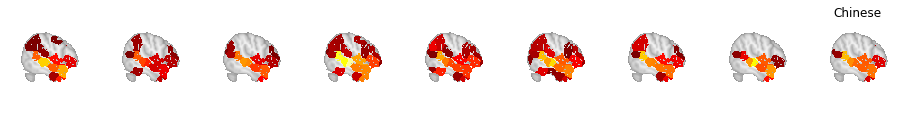

In [270]:
f = plt.figure(figsize=(16,4))

x_slice = 0

n_runs = 9
for n in range(n_runs):
    ax = f.add_subplot(1,n_runs, n + 1)
    
    curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_english[:,n], (1, 293)))
    plotting.plot_stat_map( curr_img, 
                            colorbar     = False, 
                            annotate     = False,
                            display_mode = "x",
                            cut_coords   = [xslice],
                            threshold    = 0.05,
                            vmax         = 0.3,
                            axes         = ax,
                             );
    
    ax.set_aspect('equal')
    
f.subplots_adjust(wspace=0, hspace=0)
plt.title('English')

###
f = plt.figure(figsize=(16,4))

x_slice = 0

n_runs = 9
for n in range(n_runs):
    ax = f.add_subplot(1,n_runs, n + 1)
    
    curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_french[:,n], (1, 293)))
    plotting.plot_stat_map( curr_img, 
                            colorbar     = False, 
                            annotate     = False,
                            display_mode = "x",
                            cut_coords   = [xslice],
                            threshold    = 0.05,
                            vmax         = 0.3,
                            axes         = ax,
                             );
    
    ax.set_aspect('equal')
    
f.subplots_adjust(wspace=0, hspace=0)
plt.title('French')


###
f = plt.figure(figsize=(16,4))

x_slice = 0

n_runs = 9
for n in range(n_runs):
    ax = f.add_subplot(1,n_runs, n + 1)
    
    curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_chinese[:,n], (1, 293)))
    plotting.plot_stat_map( curr_img, 
                            colorbar     = False, 
                            annotate     = False,
                            display_mode = "x",
                            cut_coords   = [xslice],
                            threshold    = 0.05,
                            vmax         = 0.3,
                            axes         = ax,
                             );
    
    ax.set_aspect('equal')
    
f.subplots_adjust(wspace=0, hspace=0)
plt.title('Chinese')



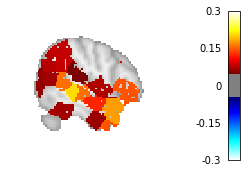

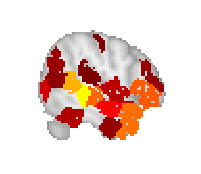

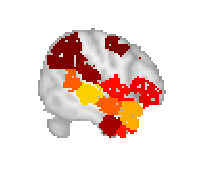

In [272]:
xslice = 55

curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_english[:,0], (1, 293)))
plotting.plot_stat_map( curr_img, 
                        colorbar=True, 
                        annotate = False,
                        display_mode="x",
                        cut_coords= [xslice],
                        threshold = 0.05,
                        vmax = 0.3,
                         );

curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_french[:,0], (1, 293)))
plotting.plot_stat_map( curr_img, 
                        colorbar= False, 
                        annotate = False,
                        display_mode="x",
                        cut_coords= [xslice],
                        threshold = 0.05,
                        vmax = 0.3,
                         );

curr_img = all293_masker_reopened.inverse_transform(np.reshape(isc_chinese[:,0], (1, 293)))
plotting.plot_stat_map( curr_img, 
                        colorbar= False, 
                        annotate = False,
                        display_mode="x",
                        cut_coords = [xslice],
                        threshold = 0.05,
                        vmax = 0.3,
                        #symmetric_cbar = False,
                         );